In [1]:
import numpy as np
import matplotlib.pyplot as plt

def black_box(x):
	eps = np.random.normal(0, 0.5)
	return np.sin(2 * x) + x * np.cos(x - 1) + eps

def make_data(N):
	data = []
	for i in range(0, N):
		x = np.random.uniform(-10, 10)
		data.append((x, black_box(x)))
	return data

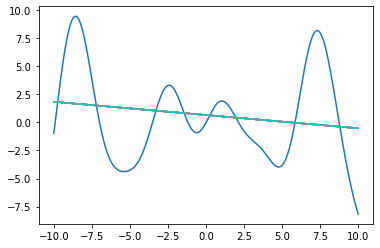

########## LINEAR MODEL ##########
Total error est.: 3.8265279654498094
Residual error est.: 0.2471564418806448
Squared bias est.: 3.3650848317189097
Variance est.: 0.2142866918502549
######## NON-LINEAR MODEL ########
Total error est.: 0.5579929009736562
Residual error est.: 0.2545687122113296
Squared bias est.: 0.011929343981529714
Variance est.: 0.2914948447807968


In [2]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeRegressor

# Number of x sampled
N_learn = 100
# Number of y^ or y sampled for a same x through the regression method
N_test = 500

# Choose linear and non linear models
lin = LinearRegression()
nlin = DecisionTreeRegressor()

def est_errors(x0, model, N_y, N_ls):
	# for a given x0, generate N_y y through the black box as possible.
	y0s = [black_box(x0) for i in range(0, N_y)]
	# Do the same through the prediction model by fitting N_y different learning samples
	y0s_est = np.zeros(N_y)
	for i in range(0, N_y):
		x_ls = np.array([np.random.uniform(-10, 10) for i in range(0, N_ls)])
		y_ls = [black_box(x) for x in x_ls]
		model_fit = model.fit(x_ls.reshape(-1,1), y_ls)
		y0s_est[i] = model_fit.predict([[x0]])

	# Residual error estimation: generate N_y samples 
	# at x = x0 and compute the variance of the y values.
	residual_error_est = np.var(y0s)

	# Squared bias estimation
	sqbias_est = (np.mean(y0s) - np.mean(y0s_est))**2

	# Variance estimation
	variance_est = np.var(y0s_est)

	return residual_error_est, sqbias_est, variance_est

# real noiseless data
xs = np.arange(-10, 10, 0.01)
ys = [np.sin(2 * x) + x * np.cos(x - 1) for x in xs]
plt.plot(xs, ys)

# predicted data using a linear model
for a in np.arange(0.1, 1, 0.1):
	model_fit = lm.Ridge(alpha=a).fit(xs.reshape(-1,1), ys)
	y_pred = model_fit.predict(xs.reshape(-1, 1))
	plt.plot(xs, y_pred)

plt.show()

lin_errors = est_errors(3, lin, N_test, N_learn)
print("########## LINEAR MODEL ##########")
print("Total error est.: " + str(np.sum(lin_errors)))
print("Residual error est.: " + str(lin_errors[0]))
print("Squared bias est.: " + str(lin_errors[1]))
print("Variance est.: " + str(lin_errors[2]))

nlin_errors = est_errors(3, nlin, N_test, N_learn)
print("######## NON-LINEAR MODEL ########")
print("Total error est.: " + str(np.sum(nlin_errors)))
print("Residual error est.: " + str(nlin_errors[0]))
print("Squared bias est.: " + str(nlin_errors[1]))
print("Variance est.: " + str(nlin_errors[2]))

In [16]:
N_mean = 200
x_mean = np.sort(np.array([np.random.uniform(-10, 10) for i in range(0, N_mean)]))

lin_errors = [est_errors(x, lin, N_test, N_learn) for x in x_mean]
lin_mean_errors = np.mean(lin_errors, axis=0)
print("########## LINEAR MODEL ##########")
print("Total error est.: " + str(np.sum(lin_mean_errors)))
print("Residual error est.: " + str(lin_mean_errors[0]))
print("Squared bias est.: " + str(lin_mean_errors[1]))
print("Variance est.: " + str(lin_mean_errors[2]))

nlin_errors = [est_errors(x, nlin, N_test, N_learn) for x in x_mean]
nlin_mean_errors = np.mean(nlin_errors, axis=0)
print("######## NON-LINEAR MODEL ########")
print("Total error est.: " + str(np.sum(nlin_mean_errors)))
print("Residual error est.: " + str(nlin_mean_errors[0]))
print("Squared bias est.: " + str(nlin_mean_errors[1]))
print("Variance est.: " + str(nlin_mean_errors[2]))

Y MEAN: 0.21920506510102597
Y_est MEAN: 2.3954314192795545
Y MEAN: 2.7983597994193605
Y_est MEAN: 2.5871142905698945
Y MEAN: 3.355804304323382
Y_est MEAN: 1.5713267936604411
Y MEAN: 3.3569165243982884
Y_est MEAN: 3.0948005307612765
Y MEAN: 4.122314386449308
Y_est MEAN: 1.717735686458883
Y MEAN: 5.16260608362886
Y_est MEAN: 1.7861816024869481
Y MEAN: 5.2633303590213565
Y_est MEAN: 2.5300312122957567
Y MEAN: 5.478256167302947
Y_est MEAN: 2.1917444966771753
Y MEAN: 5.505893483388705
Y_est MEAN: 2.624952488089693
Y MEAN: 5.821816186819174
Y_est MEAN: 2.5913590372739046
Y MEAN: 6.896847770710836
Y_est MEAN: 1.5079938544048095
Y MEAN: 7.937834624242934
Y_est MEAN: 2.343027619237999
Y MEAN: 8.404489400511942
Y_est MEAN: 0.5221896786103112
Y MEAN: 9.476190516877937
Y_est MEAN: 1.7455373319457992
Y MEAN: 9.445741291292267
Y_est MEAN: 1.156138371768894
Y MEAN: 9.407122372058566
Y_est MEAN: 3.2590590797114776
Y MEAN: 9.19463870564576
Y_est MEAN: 1.5554553525317478
Y MEAN: 8.45671084555878
Y_est M

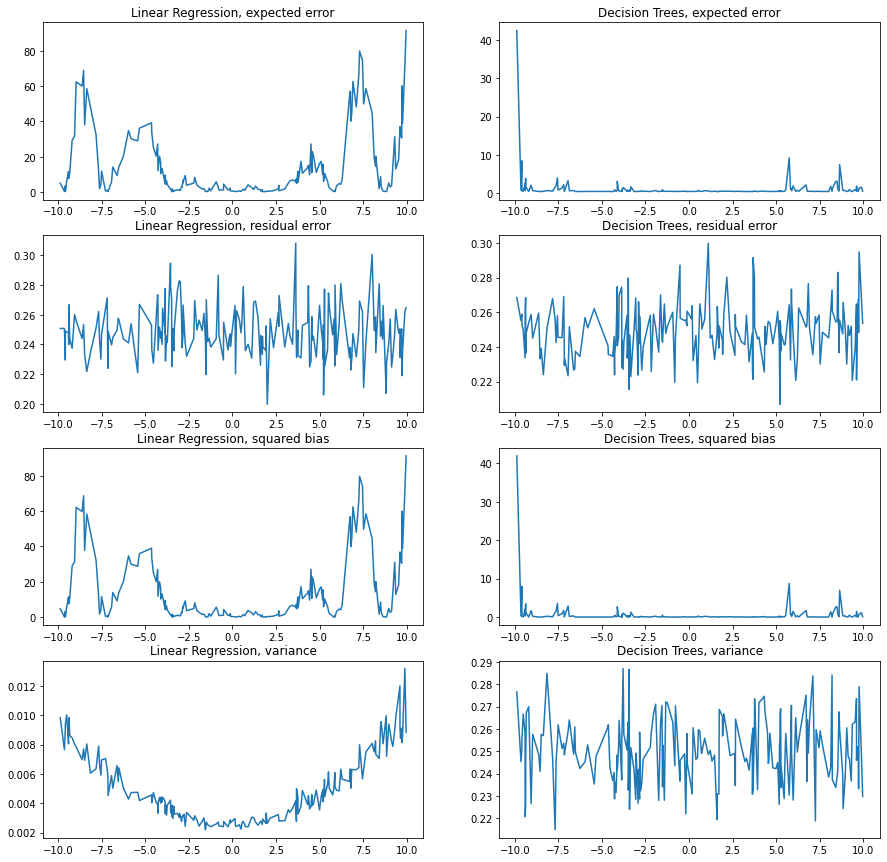

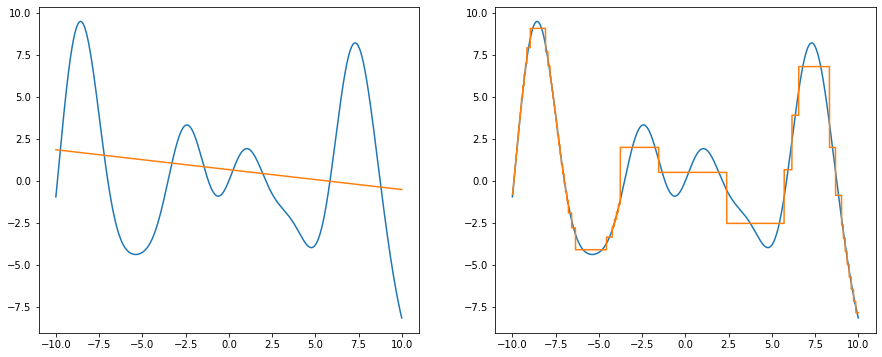

In [46]:
# (d) Plot values as functions of x.
real_data = [np.sin(2 * x) + x * np.cos(x - 1) for x in x_mean]

rs = [errs[0] for errs in lin_errors]
bs = [errs[1] for errs in lin_errors]
vs = [errs[2] for errs in lin_errors]

sum_lin = np.array(rs)+np.array(bs)+np.array(vs)
fig, axs = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0,0].plot(x_mean, sum_lin)
axs[0,0].set_title("Linear Regression, expected error")
axs[1,0].plot(x_mean, rs)
axs[1,0].set_title("Linear Regression, residual error")
axs[2,0].plot(x_mean, bs)
axs[2,0].set_title("Linear Regression, squared bias")
axs[3,0].plot(x_mean, vs)
axs[3,0].set_title("Linear Regression, variance")

rs = [errs[0] for errs in nlin_errors]
bs = [errs[1] for errs in nlin_errors]
vs = [errs[2] for errs in nlin_errors]

sum_nlin = np.array(rs)+np.array(bs)+np.array(vs)
axs[0,1].plot(x_mean, sum_nlin)
axs[0,1].set_title("Decision Trees, expected error")
axs[1,1].plot(x_mean, rs)
axs[1,1].set_title("Decision Trees, residual error")
axs[2,1].plot(x_mean, bs)
axs[2,1].set_title("Decision Trees, squared bias")
axs[3,1].plot(x_mean, vs)
axs[3,1].set_title("Decision Trees, variance")

fig, axs = plt.subplots(1, 2)
xs = np.arange(-10, 10, 0.01)
ys = [np.sin(2 * x) + x * np.cos(x - 1) for x in xs]
axs[0].plot(xs, ys)
axs[1].plot(xs, ys)

x_ls = np.array([np.random.uniform(-10, 10) for i in range(0, N_learn)])
y_ls = [black_box(x) for x in x_ls]
lin_fit = LinearRegression().fit(x_ls.reshape(-1,1), y_ls)
nlin_fit = DecisionTreeRegressor(max_depth=6).fit(x_ls.reshape(-1,1), y_ls)

axs[0].plot(xs, lin_fit.fit(xs.reshape(-1, 1), ys).predict(xs.reshape(-1, 1)))
axs[1].plot(xs, nlin_fit.fit(xs.reshape(-1, 1), ys).predict(xs.reshape(-1, 1)))
fig.set_figheight(6)
fig.set_figwidth(15)

In [3]:
# (e) 

x_vals = np.sort(np.array([np.random.uniform(-10, 10) for i in range(0, 75)]))
ls_sizes = [10, 20, 30, 50, 100, 500]
lin_errors = []
for N_x in ls_sizes:
	lin_err = [list(est_errors(x, lin, 100, N_x)) for x in x_vals]
	lin_err_mean = np.mean(lin_err, axis=0).tolist()
	lin_errors.append([np.sum(np.array(lin_err_mean))] + lin_err_mean)
	
nlin_errors = []
for N_x in ls_sizes:
	nlin_err = [list(est_errors(x, DecisionTreeRegressor(), 100, N_x)) for x in x_vals]
	nlin_err_mean = np.mean(nlin_err, axis=0).tolist()
	nlin_errors.append([np.sum(np.array(nlin_err_mean))] + nlin_err_mean)

nlin_errors_depth = []
max_depths = [3,5,8,10,15,20]
for d in max_depths:
	nlin_model = DecisionTreeRegressor(max_depth=d)
	nlin_errd = [list(est_errors(x, nlin_model, 100, 100)) for x in x_vals]
	lin_errd_mean = np.mean(nlin_errd, axis=0).tolist()
	nlin_errors_depth.append([np.sum(np.array(lin_errd_mean))] + lin_errd_mean)

Text(0.5, 1.0, 'Variance')

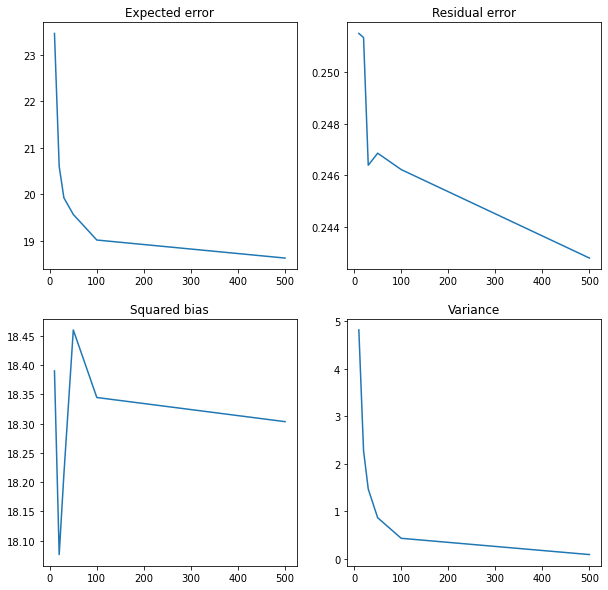

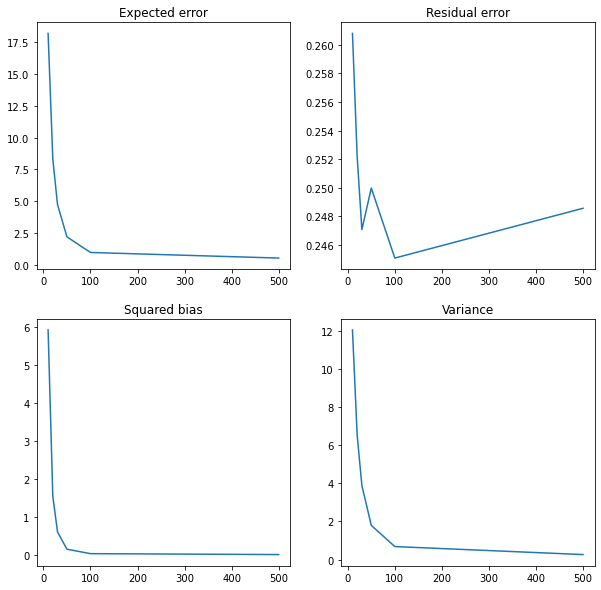

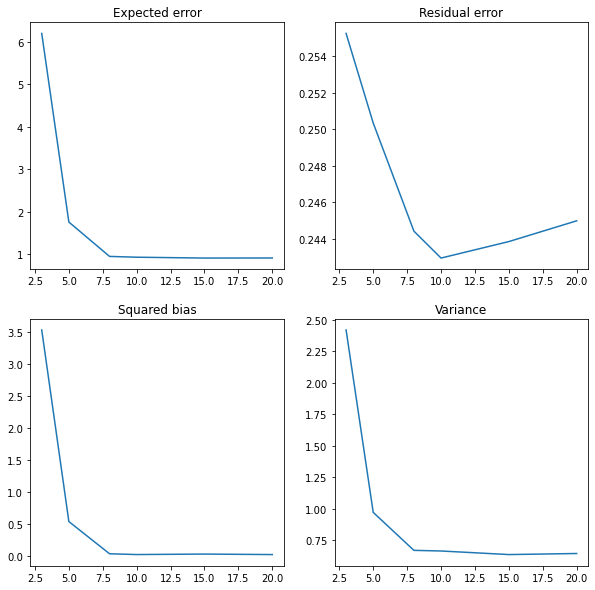

In [5]:
z = list(zip(*lin_errors))
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
axs[0,0].plot(ls_sizes, z[0])
axs[0,0].set_title("Expected error")
axs[0,1].plot(ls_sizes, z[1])
axs[0,1].set_title("Residual error")
axs[1,0].plot(ls_sizes, z[2])
axs[1,0].set_title("Squared bias")
axs[1,1].plot(ls_sizes, z[3])
axs[1,1].set_title("Variance")

z = list(zip(*nlin_errors))
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
axs[0,0].plot(ls_sizes, z[0])
axs[0,0].set_title("Expected error")
axs[0,1].plot(ls_sizes, z[1])
axs[0,1].set_title("Residual error")
axs[1,0].plot(ls_sizes, z[2])
axs[1,0].set_title("Squared bias")
axs[1,1].plot(ls_sizes, z[3])
axs[1,1].set_title("Variance")

z = list(zip(*nlin_errors_depth))
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
axs[0,0].plot(max_depths, z[0])
axs[0,0].set_title("Expected error")
axs[0,1].plot(max_depths, z[1])
axs[0,1].set_title("Residual error")
axs[1,0].plot(max_depths, z[2])
axs[1,0].set_title("Squared bias")
axs[1,1].plot(max_depths, z[3])
axs[1,1].set_title("Variance")
#